In [1]:
import dice_ml
from dice_ml.utils import helpers # helper functions
from sklearn.model_selection import train_test_split

dataset = helpers.load_adult_income_dataset()
target = dataset["income"] # outcome variable
train_dataset, test_dataset, _, _ = train_test_split(dataset,
                                                     target,
                                                     test_size=0.2,
                                                     random_state=0,
                                                     stratify=target)
# Dataset for training an ML model
d = dice_ml.Data(dataframe=train_dataset,
                 continuous_features=['age', 'hours_per_week'],
                 outcome_name='income')

# Pre-trained ML model
m = dice_ml.Model(model_path=dice_ml.utils.helpers.get_adult_income_modelpath(),
                  backend='TF2', func="ohe-min-max")

In [2]:
# DiCE explanation instance
exp = dice_ml.Dice(d,m)

# Generate counterfactual examples
query_instance = test_dataset.drop(columns="income")[0:1]

In [3]:
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite")

100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


In [4]:
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,29,Private,HS-grad,Married,Blue-Collar,White,Female,38,0



Diverse Counterfactual set (new outcome: 1.0)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,40.0,Private,HS-grad,Married,Sales,White,Female,38,1
1,70.0,Private,Doctorate,Married,Blue-Collar,White,Female,38,1
2,29,Private,Bachelors,Married,Sales,White,Female,38,1
3,29.0,Private,Doctorate,Married,Blue-Collar,White,Female,38,1


With custom model

In [5]:
import pandas as pd 
train_dataset = pd.read_csv("../data/adult.csv")

In [6]:
import json
with open('../data/adult_constraints.json', 'r') as f:
    constr = json.load(f)

constr['features_order_nonsplit']

['hours.per.week',
 'age',
 'capital.loss',
 'education.num',
 'capital.gain',
 'workclass',
 'marital.status',
 'occupation',
 'race',
 'sex',
 'native.country',
 'income']

In [7]:
train_dataset = train_dataset[constr['features_order_nonsplit']]

In [8]:
train_dataset.columns

Index(['hours.per.week', 'age', 'capital.loss', 'education.num',
       'capital.gain', 'workclass', 'marital.status', 'occupation', 'race',
       'sex', 'native.country', 'income'],
      dtype='object')

In [9]:
d = dice_ml.Data(dataframe=train_dataset,
                 continuous_features=constr['continuous_features_nonsplit'],
                 categorical_features=constr['categorical_features_nonsplit'],
                 outcome_name=constr['target_feature'])

In [10]:
query_instance = train_dataset.drop(columns="income")[0:1]
query_instance.columns

Index(['hours.per.week', 'age', 'capital.loss', 'education.num',
       'capital.gain', 'workclass', 'marital.status', 'occupation', 'race',
       'sex', 'native.country'],
      dtype='object')

In [11]:
train_columns = d.get_ohe_min_max_normalized_data(query_instance).columns

In [12]:
actionable_features = constr['actionable_features']
feature_ranges = constr['feature_ranges']

In [13]:
# Tensorflow version
model = dice_ml.Model(model_path='../models/adult_NN/', backend='TF2', func="ohe-min-max")

# Sklearn version
# import joblib 
# rf_model = joblib.load('../models/adult_RF.joblib')
# model = dice_ml.Model(model=rf_model, backend='sklearn', func='ohe-min-max')

custom_explainer = dice_ml.Dice(d,model)

dice_exp = custom_explainer.generate_counterfactuals(
    query_instances=query_instance, 
    total_CFs=50, 
    desired_class="opposite",
    features_to_vary=actionable_features,
    permitted_range=feature_ranges
    )

100%|██████████| 1/1 [00:10<00:00, 10.41s/it]


In [14]:
dice_exp.visualize_as_dataframe(show_only_changes=False)

Query instance (original outcome : 1)


,hours.per.week,age,capital.loss,education.num,capital.gain,workclass,marital.status,occupation,race,sex,native.country,income
0,40,90,4356,9,0,?,Widowed,?,White,Female,United-States,1



Diverse Counterfactual set (new outcome: 0.0)


,hours.per.week,age,capital.loss,education.num,capital.gain,workclass,marital.status,occupation,race,sex,native.country,income
0,6.0,26.0,4356,9,0,?,Separated,?,White,Female,United-States,0
1,5.0,21.0,4356,14.0,78366.0,State-gov,Widowed,Farming-fishing,White,Female,United-States,0
2,5.0,61.0,4356,7.0,33808.0,Private,Widowed,?,White,Female,United-States,0
3,6.0,24.0,4356,9,19222.0,Federal-gov,Separated,Armed-Forces,White,Female,United-States,0
4,4.0,40.0,4356,13.0,0,Private,Widowed,?,White,Female,United-States,0
5,6.0,57.0,4356,9,0,?,Widowed,?,White,Female,United-States,0
6,3.0,38.0,4356,9,57033.0,?,Widowed,?,White,Female,United-States,0
7,6.0,47.0,4356,9,0,?,Divorced,?,White,Female,United-States,0
8,6.0,49.0,4356,11.0,0,?,Widowed,?,White,Female,United-States,0
9,14.0,18.0,4356,9,0,Federal-gov,Widowed,Handlers-cleaners,White,Female,United-States,0


Visualization

In [15]:
train_normalized_data = d.get_ohe_min_max_normalized_data(train_dataset.drop(columns="income"))
query_normalized= d.get_ohe_min_max_normalized_data(query_instance)
train_data_target = train_dataset["income"]

In [20]:
train_dataset.columns

Index(['hours.per.week', 'age', 'capital.loss', 'education.num',
       'capital.gain', 'workclass', 'marital.status', 'occupation', 'race',
       'sex', 'native.country', 'income'],
      dtype='object')

In [21]:
from dice_ml.constants import  _SchemaVersions
cfs = json.loads(dice_exp.cf_examples_list[0].to_json(_SchemaVersions.V2))
counterfactuals = pd.DataFrame(cfs['final_cfs_list'], columns=train_dataset.columns)

In [22]:
counterfactuals_normalized = d.get_ohe_min_max_normalized_data(counterfactuals)

In [18]:
from visualization_helpers import *

mask_indices = [1 if any([act in x for act in actionable_features]) else 0 for x in constr['features_order_after_split']]

scores_df= get_scores(counterfactuals_normalized.to_numpy(), query_normalized, train_normalized_data, train_data_target, mask_indices)

scores_df.head(5)

,cf,proximity,features_changed,feasibility,actionability,preference_dcg,discriminative_power,1-preference_dcg,1-discriminative_power
0,"[0.05102040816326531, 0.1232876712328767, 1.0,...",9.223651,10,5.206677,False,1.263565,0.100000,-0.263565,0.900000
1,"[0.04081632653061224, 0.0547945205479452, 1.0,...",10.419350,12,7.360283,False,1.836232,0.200000,-0.836232,0.800000
2,"[0.04081632653061224, 0.6027397260273972, 1.0,...",9.225820,12,6.493054,False,0.996384,0.300000,0.003616,0.700000
3,"[0.05102040816326531, 0.0958904109589041, 1.0,...",9.443270,11,5.387190,False,1.373748,0.100000,-0.373748,0.900000
4,"[0.030612244897959183, 0.3150684931506849, 1.0...",9.318945,11,6.427658,False,1.205118,0.166667,-0.205118,0.833333


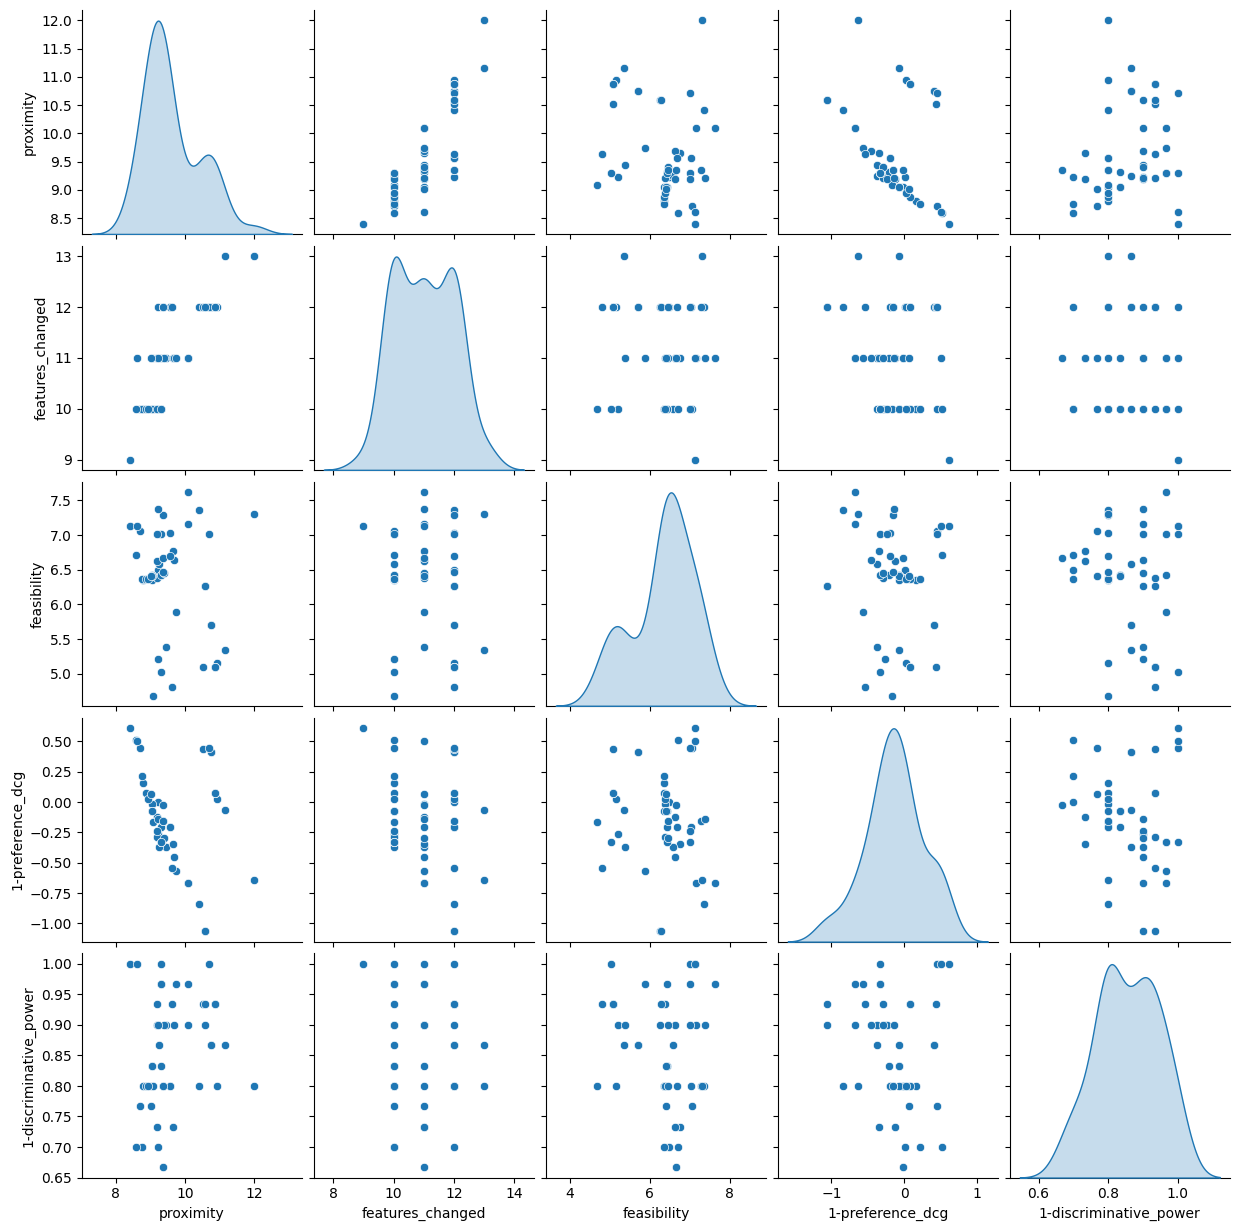

In [19]:
import seaborn as sns 

sns.pairplot(scores_df, vars=['proximity', 'features_changed', 'feasibility', '1-preference_dcg', '1-discriminative_power'], diag_kind='kde')